Customer Segmentation using K-Means

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Add this line to download the dataset if it's not already present

In [2]:
!gdown --id 1s42BqL-aKxZ5Y-eE2Q40wR9b1-e2L1S0

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1s42BqL-aKxZ5Y-eE2Q40wR9b1-e2L1S0

but Gdown can't. Please check connections and permissions.


Load Dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


We use Annual Income and Spending Score for clustering

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Feature Scaling (Important for K-Means)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determine Optimal Number of Clusters (Elbow Method)

In [7]:
wcss = []  # Within-Cluster Sum of Squares

In [8]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


Plot Elbow Graph

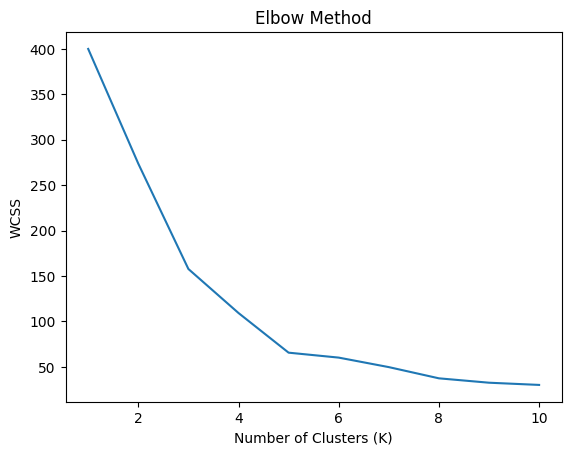

In [9]:
plt.figure()
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Apply K-Means with Optimal K (Usually 5 for this dataset)

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Add cluster labels to dataset

In [11]:
df['Cluster'] = clusters

Evaluate Clustering using Silhouette Score

In [12]:
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5546571631111091


Visualize Clusters

In [13]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

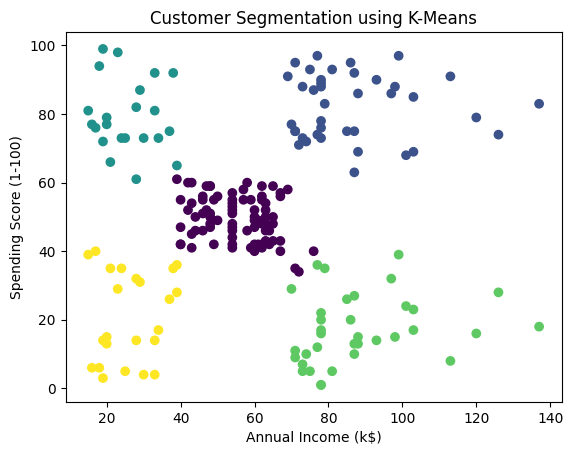

In [14]:
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster']
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.show()

Display Clustered Data

In [15]:
print("\nClustered Data Sample:")
print(df.head())


Clustered Data Sample:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


Check Cluster Sizes

In [16]:
print("\nNumber of Customers in Each Cluster:")
print(df['Cluster'].value_counts())


Number of Customers in Each Cluster:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64
